In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [2]:
xs, ys = load_breast_cancer(return_X_y=True)
xt, xv, yt, yv = train_test_split(xs, ys, test_size=0.3, random_state=0)
std = StandardScaler()
std.fit(xt)
xt_std = std.transform(xt)
xv_std = std.transform(xv)

print(xt_std.shape, xt_std.dtype)
print(xv_std.shape, xv_std.dtype)

(398, 30) float64
(171, 30) float64


In [3]:
clf = RandomForestClassifier(criterion='entropy', n_estimators=100, n_jobs=2)
clf.fit(xt_std, yt)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print(indices) # feature indices
print(importances[indices]) # feature importances

[27 22  7 20 23 26  3  2  6  0 13 10 21  1  5 28 24 12 25 16 17 18 15  4 29
 11  8  9 19 14]
[ 0.13642723  0.11279142  0.11117346  0.10585326  0.06654693  0.05976137
  0.0543455   0.04740772  0.04133673  0.03323754  0.03122171  0.02329079
  0.02197561  0.01885021  0.01477583  0.01460866  0.0142921   0.01279332
  0.0115911   0.00791609  0.0078574   0.00710357  0.00702729  0.00686065
  0.0066147   0.00632942  0.00582423  0.00458434  0.00405134  0.00355048]


In [4]:
result = []
for k in tqdm(range(1, xs.shape[1] + 1)):
    xt_subset = xt_std[:, indices[:k]]
    xv_subset = xv_std[:, indices[:k]]
    clf = RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0, n_jobs=2)
    clf.fit(xt_subset, yt)
    acc = clf.score(xv_subset, yv)
    apf = acc / k
    result.append({'n_features': k, 'acc': acc, 'apf': apf})

100%|██████████| 30/30 [00:16<00:00,  1.81it/s]


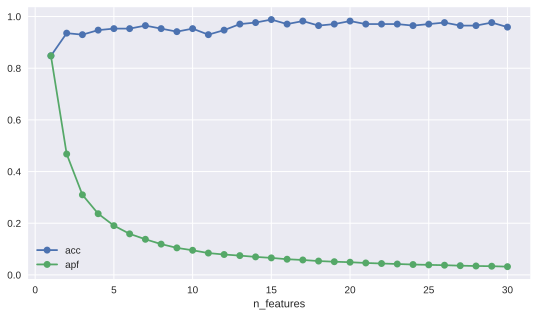

In [5]:
df = pd.DataFrame(result)
fig, ax = plt.subplots(dpi=100, figsize=(9, 5))
ax.set_xlabel('#Features')
df.plot(kind='line', x='n_features', style='-o', ax=ax)
plt.show()

In [6]:
df[:1]

,acc,apf,n_features
0,0.847953,0.847953,1
